<a href="https://colab.research.google.com/github/F404F/Digital-Signal-Processing/blob/main/Trabalho-1-Processamento-de-Voz/Trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EEL7522-06202 (20201) - Processamento Digital de Sinais

##Felipe Castro de Freitas - 14209569

###Projeto Processamento de Voz

**Este projeto individual visa estudar algoritmos de processamento de sinais e aplicá-los em filtragem e reconhecimento de voz.**



###Importação das bibliotecas necessárias

In [2]:
!pip install pydub      # splitting audio files and stuff

from io import BytesIO
import tempfile
import requests
import numpy as np
import scipy.signal as sg
import pydub
import matplotlib.pyplot as plt
from IPython.display import Audio, display
%matplotlib inline

###Conversão MP3 -> WAV para uso como array

In [3]:
def speak(data):
    # We convert the mp3 bytes to wav.
    audio = pydub.AudioSegment.from_mp3(BytesIO(data))
    with tempfile.TemporaryFile() as fn:
        wavef = audio.export(fn, format='wav')
        wavef.seek(0)
        wave = wavef.read()
    # We get the raw data by removing the 24 first
    # bytes of the header.
    x = np.frombuffer(wave, np.int16)[24:] / 2.**15
    return x, audio.frame_rate

###Função para Reprodução do arquivo

In [4]:
def play(x, fr, autoplay=False):
    display(Audio(x, rate=fr, autoplay=autoplay))

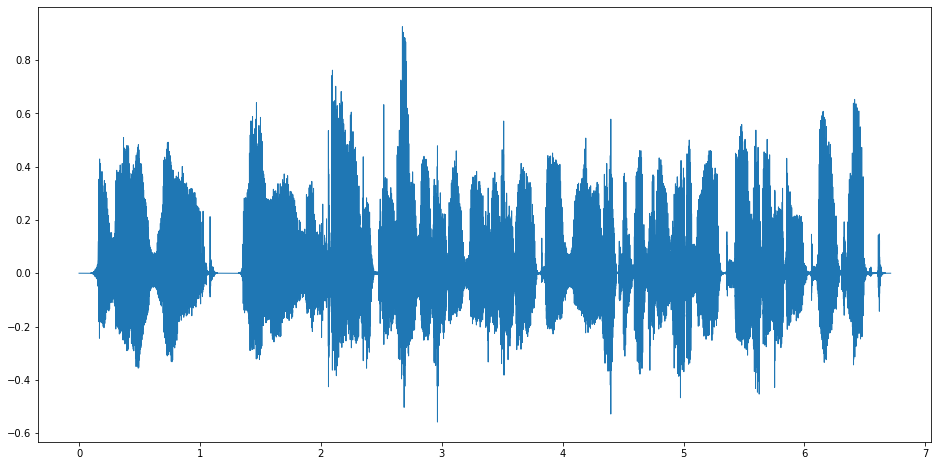

In [8]:
url = ('https://github.com/F404F/'
       'Digital-Signal-Processing/blob/main/'
       'Trabalho-1-Processamento-de-Voz/'
       'Alice.mp3?raw=true')
voice = requests.get(url).content
x, fr = speak(voice)
play(x, fr)
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
t = np.linspace(0., len(x) / fr, len(x))
ax.plot(t, x, lw=1)



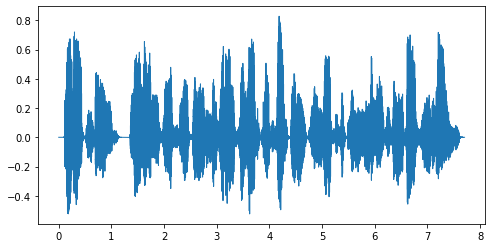

In [7]:
url = ('https://github.com/F404F/'
       'Digital-Signal-Processing/blob/main/'
       'Trabalho-1-Processamento-de-Voz/'
       'Felipe.mp3?raw=true')
voice = requests.get(url).content
x, fr = speak(voice)
play(x, fr)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
t = np.linspace(0., len(x) / fr, len(x))
ax.plot(t, x, lw=1)


1) Filtragem com esquecimento usando α=0,98,0,5,−0,98,−0,5. Salve cada resultado do processamento em arquivos no formato wav usando o wavwrite. (Help wavwrite) do Scilab. Usando o Audacity, ouça os resultados e comente no relatório. Com o Audacity observe os gráficos de espectros dos sinais e os inclua no relatório. Inclua o programa fonte no relatório. Teste com outros valores de α e comente os resultados no relatório.

2) Filtragem de média móvel usando M = 50, 100, 1000. Salve cada resultado do processamento em arquivos no formato wav usando o wavwrite. (Help wavwrite) do Scilab. Usando o Audacity, ouça os resultados e comente o que observou no relatório.  Com o Audacity observe os gráficos de espectros dos sinais e os inclua no relatório. Inclua o programa fonte no relatório. Teste com outros valores de M e comente os resultados no relatório.


3) Correlação de sinais.  Segmente um trecho do sinal (aproximadamente 1 segundos) do meio do sinal, entre  2 e 3 segundos do sinal de voz. Calcule a função correlação entre o segmento com o sinal de voz e apresente o gráfico da correlação no relatório. Comente  no relatório como você poderia usar esta função de correlação para identificar o locutor. Comente no relatório como estimar qual a palavra que foi falada no segmento dentro das palavras ditas na frase toda do áudio. Comente no relatório  se usar algum filtro antes da correlação poderia ajudar no processamento ? 

Teste esta hipótese com os filtros desenvolvidos e comente no relatório os resultados. Inclua o programa fonte no relatório.

##Referências

https://ipython-books.github.io/116-applying-digital-filters-to-speech-sounds/

https://docs.scipy.org/doc/scipy/reference/signal.html

https://colab.research.google.com/github/hlecuanda/jupyter-notebooks-of-all-kinds/blob/master/InSoc.ipynb#scrollTo=rukI1gWikp5i

https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html

